In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import csv
from utils import mnist_reader
from utils.data_load import load
import codes
# Load matplotlib images inline
%matplotlib inline
# These are important for reloading any code you write in external .py files.
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Problem 4: Binary Classification

Please follow our instructions in the same order to solve the binary classification problem.
Please print out the entire results and codes when completed.

In [4]:
#X_train, y_train = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='train')
#X_test, y_test = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='t10k')

X_train = np.load('./data/binary_classification/X_train.npy')
y_train = np.load('./data/binary_classification/y_train.npy')
X_test = np.load('./data/binary_classification/X_test.npy')
y_test = np.load('./data/binary_classification/y_test.npy')

print('Train data shape: ', X_train.shape)
print('Train target shape: ', y_train.shape)
print('Test data shape: ',X_test.shape)
print('Test target shape: ',y_test.shape)

Train data shape:  (5000, 784)
Train target shape:  (5000, 1)
Test data shape:  (500, 784)
Test target shape:  (500, 1)


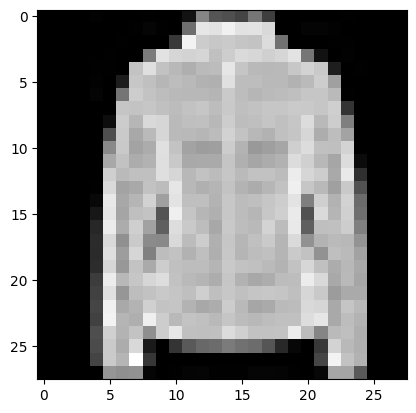

label is Shirt
dim of X_train: (5000, 784)
dim of X_test: (500, 784)


In [5]:
# PART (a): 
# To Visualize a point in the dataset
index = 11
X = np.array(X_train[index], dtype='uint8')
X = X.reshape((28, 28))
fig = plt.figure()
plt.imshow(X, cmap='gray')
plt.show()
if y_train[index] == 1:
    label = 'Dress'
else:
    label = 'Shirt'
print('label is', label)

print("dim of X_train:", X_train.shape)
print("dim of X_test:", X_test.shape)

## Train Perceptron
In the following cells, you will build Perceptron Algorithm.

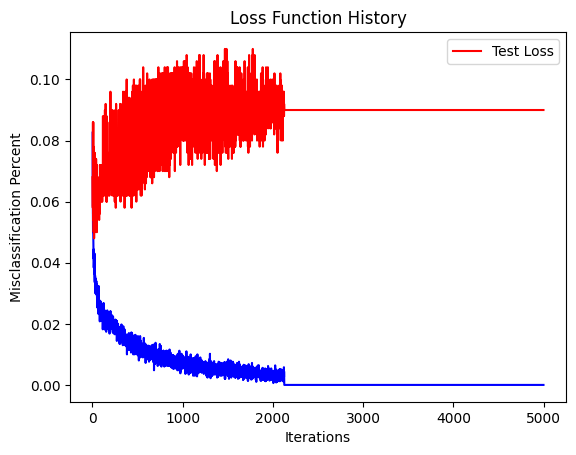

In [6]:
# PART (b),(c): 
# Implement the perceptron Algorithm and compute the number of mis-classified point
N = X_train.shape[0] # Number of data point train
N_test = X_test.shape[0] # Number of data point test
d = X_train.shape[1] # Number of features
loss_hist = []
loss_hist_test = []
W = np.zeros(d+1)
X_train_h = np.hstack((np.ones((N,1)), X_train))
X_test_h = np.hstack((np.ones((N_test,1)), X_test))
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test accuracy in the same plot
# for m range from 1 to N
# ================================================================ #

for m in range(1, N):
    misclassified = 0
    for i in range(N):
        a = np.dot(W, X_train_h[i])
        ay = a * y_train[i]
        if ay <= 0:
            W = W + y_train[i] * X_train_h[i]
            misclassified += 1

    loss_hist.append(misclassified / N)

    misclassified_test = 0
    for j in range(N_test):
        a_test = np.dot(W, X_test_h[j])
        ay_test = a_test * y_test[j]
        if ay_test <= 0:
            misclassified_test += 1
    loss_hist_test.append(misclassified_test / N_test)

plt.plot(range(1,N), loss_hist, color='blue')
plt.plot(range(1,N), loss_hist_test, label='Test Loss', color='red')
plt.xlabel('Iterations')
plt.ylabel('Misclassification Percent')
plt.title('Loss Function History')
plt.legend()
plt.show()
                 
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

## Train Logistic Regression
In the following cells, you will build a logistic regression. You will implement its loss function, then subsequently train it with gradient descent.

In [7]:
from codes.Logistic import Logistic

In [8]:
## PART (f): 
X_train = np.load('./data/binary_classification/X_train.npy')
y_train = np.load('./data/binary_classification/y_train.npy')
X_test = np.load('./data/binary_classification/X_test.npy')
y_test = np.load('./data/binary_classification/y_test.npy')
## Complete loss_and_grad function in Logistic.py file and test your results.
N,d = X_train.shape
logistic = Logistic(d=d, reg_param=0)
loss, grad = logistic.loss_and_grad(X_train,y_train)
print('Loss function=',loss)
print(np.linalg.norm(grad,ord=2)**2)

Loss function= 0.6931471805599454
4123929.10116495


/Users/codylejang/Downloads/HW1_code/codes/Logistic.py:104: RuntimeWarning: overflow encountered in exp
  h = 1 / (1 + np.exp(-a))
/Users/codylejang/Downloads/HW1_code/codes/Logistic.py:106: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(h) + (1 - y_batch) * np.log(1 - h)) / batch_size
/Users/codylejang/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/codylejang/Downloads/HW1_code/codes/Logistic.py:106: RuntimeWarning: invalid value encountered in multiply
  loss = -np.sum(y_batch * np.log(h) + (1 - y_batch) * np.log(1 - h)) / batch_size


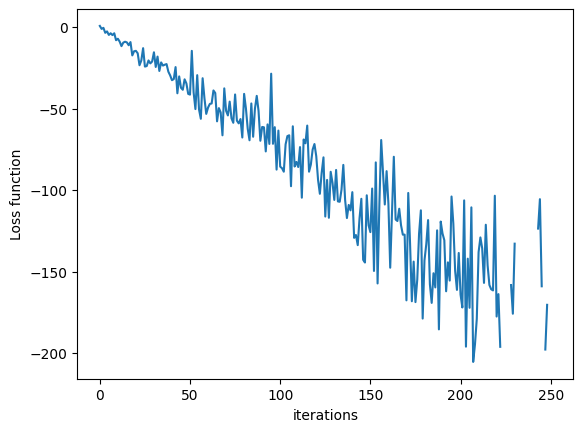

Weight squared norm 18.75259545908757
Final loss nan


In [9]:
## PART (g):
## Complete train_LR function in Logisitc.py file
loss_history, w = logistic.train_LR(X_train,y_train, eta=1e-6,batch_size=100, num_iters=5000)
fig = plt.figure()
plt.plot(loss_history)
plt.xlabel('iterations')
plt.ylabel('Loss function')
plt.show()
fig.savefig('./plots/LR_loss_hist.pdf')
print('Weight squared norm',np.linalg.norm(w,ord=2)**2)
print('Final loss',loss_history[-1])

In [33]:
# PART (h)
# Complete predict function in Logisitc.py file and compute the percentage of mis-classified points
y_pred = logistic.predict(X_test)
test_err = np.sum((y_test!=y_pred))*100/X_test.shape[0]
print(test_err,'%')

ValueError: shapes (30,3) and (785,) not aligned: 3 (dim 1) != 785 (dim 0)

/Users/codylejang/Downloads/HW1_code/codes/Logistic.py:106: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(h) + (1 - y_batch) * np.log(1 - h)) / batch_size
/Users/codylejang/Downloads/HW1_code/codes/Logistic.py:106: RuntimeWarning: invalid value encountered in multiply
  loss = -np.sum(y_batch * np.log(h) + (1 - y_batch) * np.log(1 - h)) / batch_size
/Users/codylejang/Downloads/HW1_code/codes/Logistic.py:104: RuntimeWarning: overflow encountered in exp
  h = 1 / (1 + np.exp(-a))
/Users/codylejang/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/codylejang/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


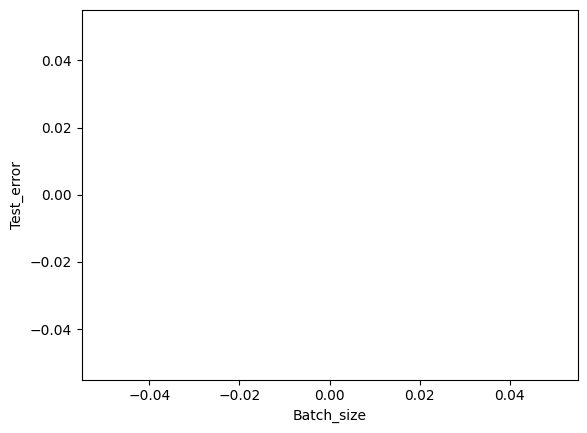

In [13]:
## PART (i): 
Batch = [1, 50 , 100, 200, 300]
test_err = np.zeros((len(Batch),1))
# ================================================================ #
# YOUR CODE HERE:
# Train the Logistic regression for different batch size. Avergae the test error over 10 times
# ================================================================ #
log_reg = Logistic()

# Define batch sizes and setup storage for test errors
Batch = [1, 50, 100, 200, 300]
test_err = np.zeros((len(Batch), 1))
test_err = []
# Assume X_train, y_train, X_test, y_test are defined and properly loaded
for i, batch_size in enumerate(Batch):
    errors = []
    for trial in range(10):
        error, w = log_reg.train_LR(X_train, y_train, eta=1e-3, batch_size=batch_size, num_iters=1000)
        errors.append(error)
    test_err.append(np.mean(errors))
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
fig = plt.figure()
plt.plot(Batch,test_err)
plt.xlabel('Batch_size')
plt.ylabel('Test_error')
plt.show()
fig.savefig('./plots/LR_Batch_test.pdf')

# Problem 5: Linear Regression
Please follow our instructions in the same order to solve the linear regresssion problem.

Please print out the entire results and codes when completed.

In [21]:
def get_data():
    """
    Load the dataset from disk and perform preprocessing to prepare it for the linear regression problem.   
    """
    X_train, y_train = load('./data/regression/regression_train.csv')
    X_test, y_test = load('./data/regression/regression_test.csv')
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test= get_data()  


print('Train data shape: ', X_train.shape)
print('Train target shape: ', y_train.shape)
print('Test data shape: ',X_test.shape)
print('Test target shape: ',y_test.shape)

Train data shape:  (30, 1)
Train target shape:  (30,)
Test data shape:  (30, 1)
Test target shape:  (30,)


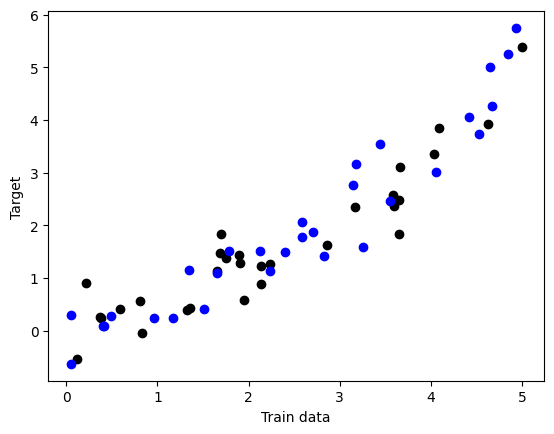

In [22]:
## PART (a): 
## Plot the training and test data ##

plt.plot(X_train, y_train,'o', color='black')
plt.plot(X_test, y_test,'o', color='blue')
plt.xlabel('Train data')
plt.ylabel('Target')
plt.show()


## Training Linear Regression
In the following cells, you will build a linear regression. You will implement its loss function, then subsequently train it with gradient descent. You will choose the learning rate of gradient descent to optimize its classification performance. Finally, you will get the opimal solution using closed form expression.

In [23]:
from codes.Regression import Regression

In [24]:
## PART (c): 
## Complete loss_and_grad function in Regression.py file and test your results.
regression = Regression(m=1, reg_param=0)
loss, grad = regression.loss_and_grad(X_train,y_train)
print('Loss value',loss)
print('Gradient value',grad)
##

[[0.]
 [0.]]
Loss value 128.47141899038579
Gradient value [[ 8.56476127  8.56476127  8.56476127  8.56476127  8.56476127  8.56476127
   8.56476127  8.56476127  8.56476127  8.56476127  8.56476127  8.56476127
   8.56476127  8.56476127  8.56476127  8.56476127  8.56476127  8.56476127
   8.56476127  8.56476127  8.56476127  8.56476127  8.56476127  8.56476127
   8.56476127  8.56476127  8.56476127  8.56476127  8.56476127  8.56476127]
 [ 3.27683701 14.52976795  5.04458804 31.27336743  7.07214972 34.5779943
  14.14665445 19.11218999 30.71886164 16.27677051 30.80760093  1.00126723
   1.88113994  3.12254132 35.06351397 18.30226941 18.28974077 31.36925622
  11.63024007 11.29514142 16.73276012 39.58061792 16.21077595 14.97322144
   6.93646237 24.48437208 42.78069639 31.24989865 14.44558169 27.10172754]]


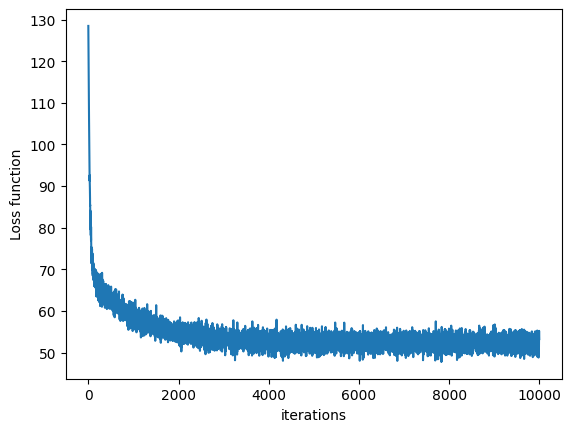

[[ 1.60800208e+00  1.59903000e+00  1.58357912e+00  1.60760022e+00
   1.63680344e+00  1.59280699e+00  1.62815945e+00  1.58746698e+00
   1.56481676e+00  1.55667714e+00  1.58050206e+00  1.58422884e+00
   1.56651665e+00  1.57756542e+00  1.58416355e+00  1.61467965e+00
   1.57043477e+00  1.58909067e+00  1.51190847e+00  1.59658174e+00
   1.61211824e+00  1.63132458e+00  1.53947333e+00  1.62540010e+00
   1.55407544e+00  1.60665710e+00  1.54914739e+00  1.57336552e+00
   1.56800674e+00  1.57320816e+00]
 [ 5.94659665e-02 -1.34342353e-03 -2.83164312e-02  3.39473458e-03
   4.77744886e-02  4.86692558e-03  7.96802425e-02 -5.07752919e-03
   1.21936008e-02 -7.11042919e-02  1.39945724e-02 -4.35045821e-03
   3.61244840e-02 -9.75319090e-03  3.80825301e-02  7.66080455e-02
   1.93255103e-02 -3.08307160e-02 -7.18100058e-02 -7.41469508e-02
   4.60075269e-02  3.00952828e-02  6.30412720e-04 -3.39106689e-02
  -3.40319774e-02  3.18463772e-02 -1.70415758e-03 -4.38633061e-03
  -2.19482060e-03 -2.27333034e-02]]
Final

In [25]:
## PART (d): 
## Complete train_LR function in Regression.py file 
loss_history, w = regression.train_LR(X_train,y_train, eta=1e-3,batch_size=30, num_iters=10000)
plt.plot(loss_history)
plt.xlabel('iterations')
plt.ylabel('Loss function')
plt.show()
print(w)
print('Final loss:',loss_history[-1])

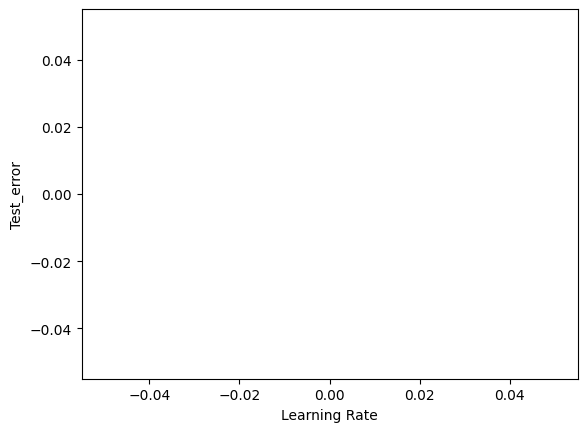

In [26]:
## PART (d) (Different Learning Rates):
from numpy.linalg import norm
lrs = [1e-1, 1e-2, 1e-3, 1e-4]
test_err = np.zeros((len(lrs),1))
# ================================================================ #
# YOUR CODE HERE:
# Train the Logistic regression for different learning rates and average the test error over 10 times
# ================================================================ #

model = Regression()

for i, lr in enumerate(lrs):
    errors = []
    for trial in range(10):
        loss_history, w = model.train_LR(X_train, y_train, eta=lr, batch_size=30, num_iters=1000)
        errors.append(error)
    test_err[i] = np.mean(errors)
    
    
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
fig = plt.figure()
plt.plot(lrs,test_err)
plt.xlabel('Learning Rate')
plt.ylabel('Test_error')
plt.show()
fig.savefig('./plots/LR_Batch_test.pdf')

In [27]:
## PART (e): 
## Complete closed_form function in Regression.py file
loss_2, w_2 = regression.closed_form(X_train, y_train)
print('Optimal solution loss',loss_2)
print('Optimal solution gradient',w_2)

Optimal solution loss 0.2641793820396444
Optimal solution gradient [-0.37906992  0.8852483 ]


In [30]:
## PART (g): 
train_loss=np.zeros((10,1))
test_loss=np.zeros((10,1))
train_loss=[]
test_loss=[]
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test loss in the same plot
# for m range from 1 to 10
# ================================================================ #
for m in range(1, 11):
    
    train, = regression.closed_form(X_train, y_train)
    train_loss.append(train)
    # Compute the loss on the test data
    test, = regression.closed_form(X_test, y_test)
    test_loss.append(test)
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
plt.plot(train_loss)
plt.plot(test_loss, color='black')
plt.show()

ValueError: could not broadcast input array from shape (30,2) into shape (30,)

In [ ]:
#PART (i): 
train_loss=np.zeros((10,1))
test_loss=np.zeros((10,1))
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test loss in the same plot
# for m range from 1 to 10
# ================================================================ #

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

plt.plot(train_loss)
plt.plot(test_loss, color='black')
plt.show()